<a href="https://colab.research.google.com/github/Anjana1-bit/fashion-mnist-classifier/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ----------------------------------------------------
# 1. Setup and Library Imports
# ----------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

# Define the class names for plotting and confusion matrix
CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
NUM_CLASSES = 10
INPUT_SHAPE = (28, 28, 1)

# Set a random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


--- 2. Data Loading & Preprocessing ---
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train set shape: (55000, 28, 28, 1)
Validation set shape: (5000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)


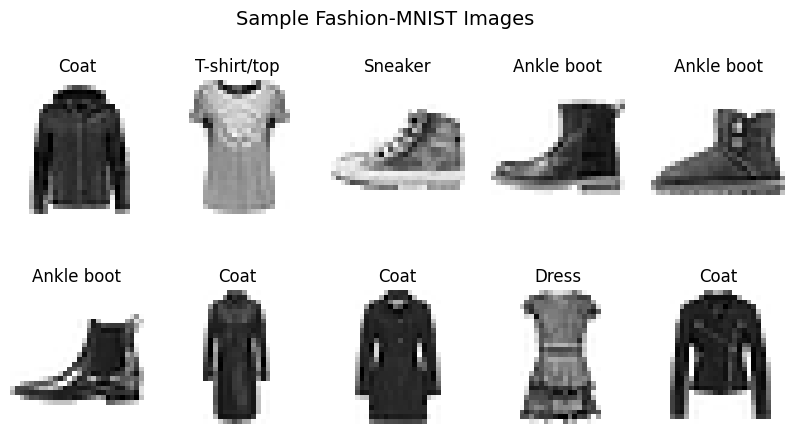

In [ ]:
# ----------------------------------------------------
# 2. Data Loading and Preprocessing
# ----------------------------------------------------
print("--- 2. Data Loading & Preprocessing ---")

# Load the Fashion-MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to the range [0, 1] (Data Understanding & Analysis)
X_train_full = X_train_full.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Split the full training set into training and validation sets
# Using 5,000 images (10%) for validation
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Reshape the data to include the channel dimension (28x28 grayscale -> 28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_valid = X_valid.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print(f"Train set shape: {X_train.shape}")
print(f"Validation set shape: {X_valid.shape}")
print(f"Test set shape: {X_test.shape}")

# Optional: Visualize a few training images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].squeeze(), cmap="binary")
    plt.title(CLASS_NAMES[y_train[i]])
    plt.axis('off')
plt.suptitle("Sample Fashion-MNIST Images", fontsize=14)
plt.show()


In [ ]:
# ----------------------------------------------------
# 3. Model Development (CNN Architecture)
# ----------------------------------------------------
print("\n--- 3. Model Development (CNN) ---")

model = Sequential([
    # Input Layer is implicitly defined by the first Conv2D layer

    # Block 1
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
           padding='same', input_shape=INPUT_SHAPE),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25), # Regularization to prevent overfitting

    # Block 2
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Classifier Head
    Flatten(), # Convert 2D feature maps to 1D vector
    Dense(128, activation='relu'),
    Dropout(0.5), # Heavier dropout for the dense layer
    Dense(NUM_CLASSES, activation='softmax') # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Used since labels are integers (0-9)
              metrics=['accuracy'])

model.summary()

# Define Callbacks: EarlyStopping to stop training if validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



--- 3. Model Development (CNN) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ----------------------------------------------------
# 4. Model Training
# ----------------------------------------------------
print("\n--- 4. Model Training ---")

history = model.fit(X_train, y_train,
                    epochs=20, # Set a reasonably high number, EarlyStopping will manage it
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping],
                    batch_size=64)



--- 4. Model Training ---
Epoch 1/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 94s 107ms/step - accuracy: 0.6987 - loss: 0.8058 - val_accuracy: 0.8704 - val_loss: 0.3564
Epoch 2/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 92s 107ms/step - accuracy: 0.8489 - loss: 0.4189 - val_accuracy: 0.8882 - val_loss: 0.2980
Epoch 3/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 138s 102ms/step - accuracy: 0.8705 - loss: 0.3590 - val_accuracy: 0.8980 - val_loss: 0.2745
Epoch 4/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 146s 106ms/step - accuracy: 0.8835 - loss: 0.3214 - val_accuracy: 0.9082 - val_loss: 0.2590
Epoch 5/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 81s 94ms/step - accuracy: 0.8885 - loss: 0.3076 - val_accuracy: 0.9130 - val_loss: 0.2430
Epoch 6/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 83s 94ms/step - accuracy: 0.8952 - loss: 0.2878 - val_accuracy: 0.9140 - val_loss: 0.2269
Epoch 7/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 79s 91ms/step - accuracy: 0.8990 - loss: 0.2761 - val_accuracy: 0.9148 - val_loss: 0.2278
Epoch 8/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 78s 91ms/step - a

In [7]:
# ----------------------------------------------------
# 5. Evaluation & Results
# ----------------------------------------------------
print("\n--- 5. Evaluation & Results ---")

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Final Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Final Test Loss: {test_loss:.4f}")

# Generate predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (Raw):\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=CLASS_NAMES))


--- 5. Evaluation & Results ---
Final Test Accuracy: 91.98%
Final Test Loss: 0.2236
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step

Confusion Matrix (Raw):
 [[860   0  14  19   5   0  99   0   3   0]
 [  0 987   0   9   2   0   1   0   1   0]
 [ 14   1 881   8  55   0  41   0   0   0]
 [  8   5   8 930  26   0  23   0   0   0]
 [  0   0  32  22 902   0  44   0   0   0]
 [  0   0   0   0   0 977   0  21   0   2]
 [100   2  60  29  68   0 738   0   3   0]
 [  0   0   0   0   0   2   0 985   1  12]
 [  5   1   1   2   3   1   4   2 981   0]
 [  0   0   1   0   0   4   0  38   0 957]]

Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.87      0.86      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.88      0.88      0.88      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.85      0.90      0.88      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt

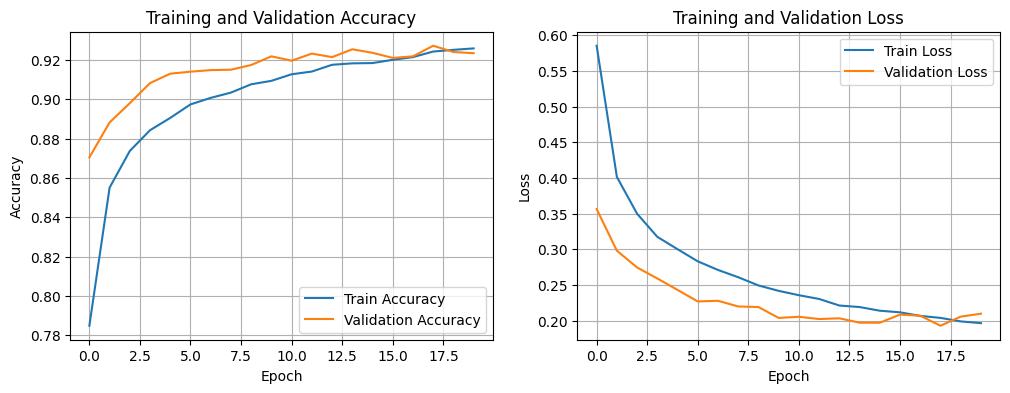

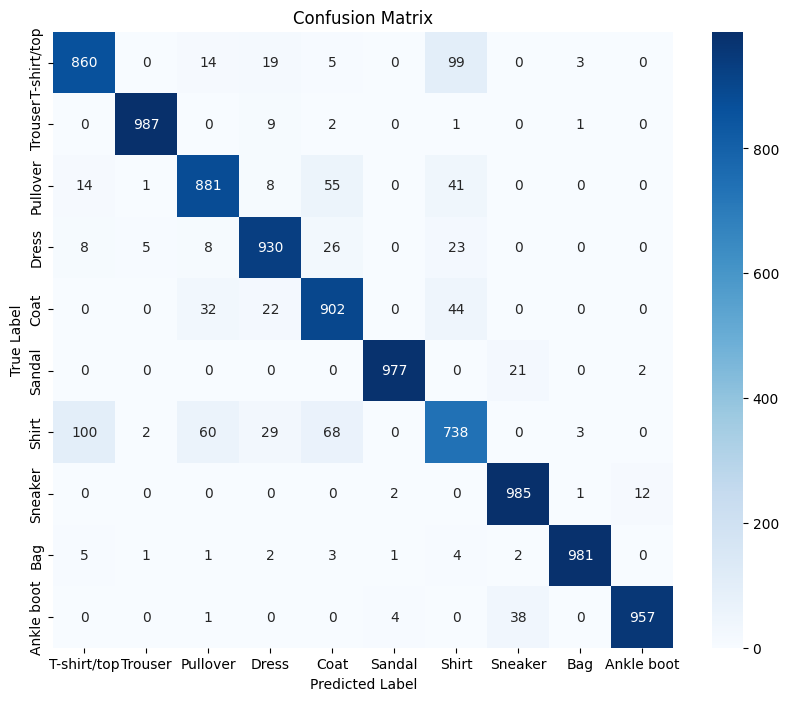

In [8]:
# ----------------------------------------------------
# 6. Visualization (Training History & Confusion Matrix)
# ----------------------------------------------------

# Plot Training History
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.show()

plot_training_history(history)

# Plot Confusion Matrix (Required Deliverable)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


--- 7. Misclassified Examples (Optional) ---


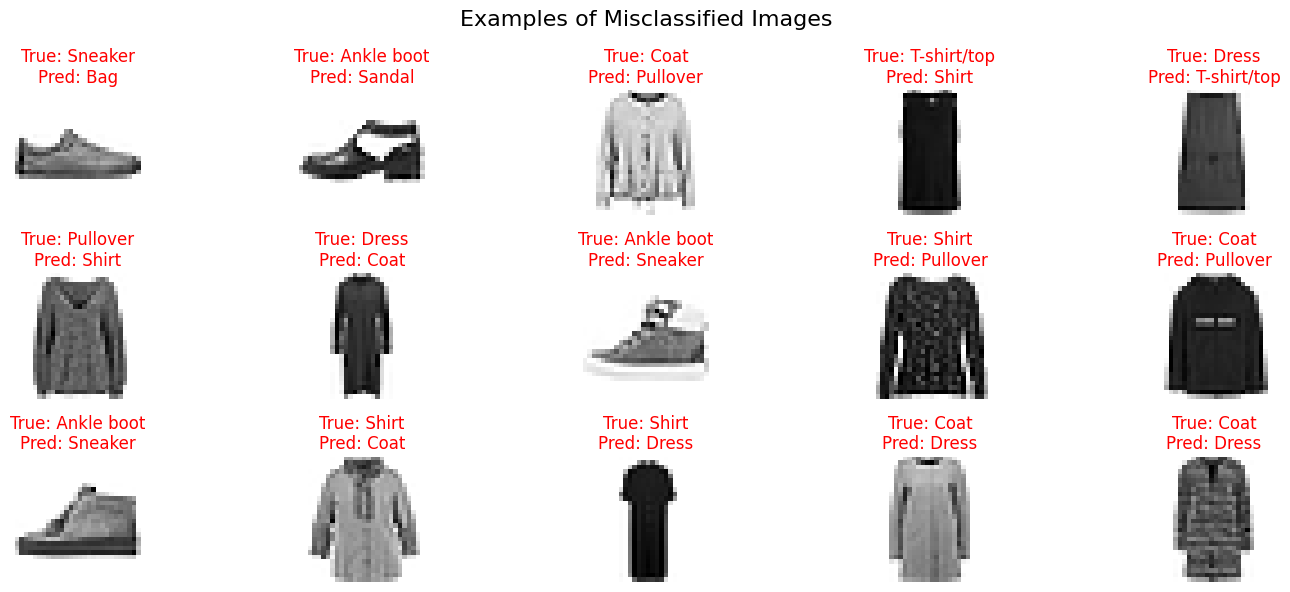

In [9]:
# ----------------------------------------------------
# 7. Optional: Visualize Misclassified Images
# ----------------------------------------------------
print("\n--- 7. Misclassified Examples (Optional) ---")

# Find misclassified indices
misclassified_idx = np.where(y_pred != y_test)[0]
n_samples = 15 # Number of misclassified samples to show

plt.figure(figsize=(15, 6))
for i in range(n_samples):
    idx = misclassified_idx[i]
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[idx].squeeze(), cmap='binary')
    plt.title(f"True: {CLASS_NAMES[y_test[idx]]}\nPred: {CLASS_NAMES[y_pred[idx]]}",
              color='red')
    plt.axis('off')
plt.suptitle("Examples of Misclassified Images", fontsize=16)
plt.tight_layout()
plt.show()


In [10]:
# ----------------------------------------------------
# 8. Create requirements.txt content
# ----------------------------------------------------
requirements_content = """
tensorflow
numpy
matplotlib
scikit-learn
seaborn
"""
# Note: In a real submission, you would save this to a file.
print("\n--- requirements.txt content ---")
print(requirements_content.strip())



--- requirements.txt content ---
tensorflow
numpy
matplotlib
scikit-learn
seaborn
